In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv('ai_job_market_insights.csv')

print("Missing values in each column:")
print(df.isnull().sum())

df.fillna({
    'Industry': 'Unknown',
    'Company_Size': 'Unknown',
    'Location': 'Unknown',
    'AI_Adoption_Level': 'Unknown',
    'Automation_Risk': 'Unknown',
    'Required_Skills': 'Unknown',
    'Salary_USD': df['Salary_USD'].median(),
    'Remote_Friendly': 'Unknown',
    'Job_Growth_Projection': 'Unknown'
}, inplace=True)

le = LabelEncoder()

df['Industry'] = le.fit_transform(df['Industry'])
df['Company_Size'] = le.fit_transform(df['Company_Size'])
df['Location'] = le.fit_transform(df['Location'])
df['AI_Adoption_Level'] = le.fit_transform(df['AI_Adoption_Level'])
df['Automation_Risk'] = le.fit_transform(df['Automation_Risk'])
df['Remote_Friendly'] = le.fit_transform(df['Remote_Friendly'])
df['Job_Growth_Projection'] = le.fit_transform(df['Job_Growth_Projection'])

df['Skills_Count'] = df['Required_Skills'].apply(lambda x: len(x.split(',')))

df.drop('Required_Skills', axis=1, inplace=True)

scaler = StandardScaler()
df['Salary_USD'] = scaler.fit_transform(df[['Salary_USD']])

df.head(10)

Missing values in each column:
Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64


,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Salary_USD,Remote_Friendly,Job_Growth_Projection,Skills_Count
0,Cybersecurity Analyst,2,2,1,2,0,0.984671,1,1,1
1,Marketing Specialist,7,0,6,2,0,0.125474,0,0,1
2,AI Researcher,7,0,6,2,0,0.778561,1,1,1
3,Sales Manager,6,2,0,1,0,0.088146,0,1,1
4,Cybersecurity Analyst,2,2,8,1,1,-0.169376,1,0,1
5,UX Designer,0,0,5,2,2,0.566430,0,1,1
6,HR Manager,3,1,6,1,0,0.529362,1,1,1
7,Cybersecurity Analyst,7,2,1,2,1,-0.225304,1,0,1
8,AI Researcher,6,0,2,0,1,-0.791189,0,2,1
9,Sales Manager,2,1,6,0,1,0.273982,1,0,1


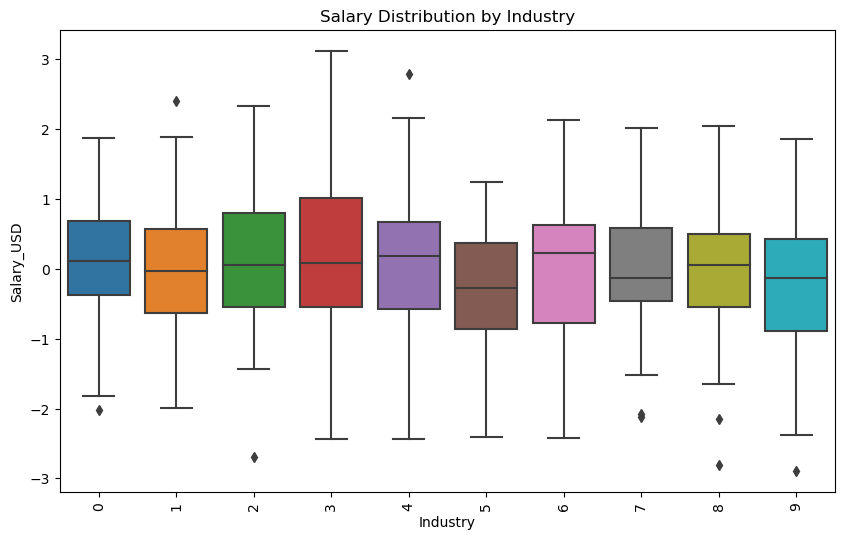

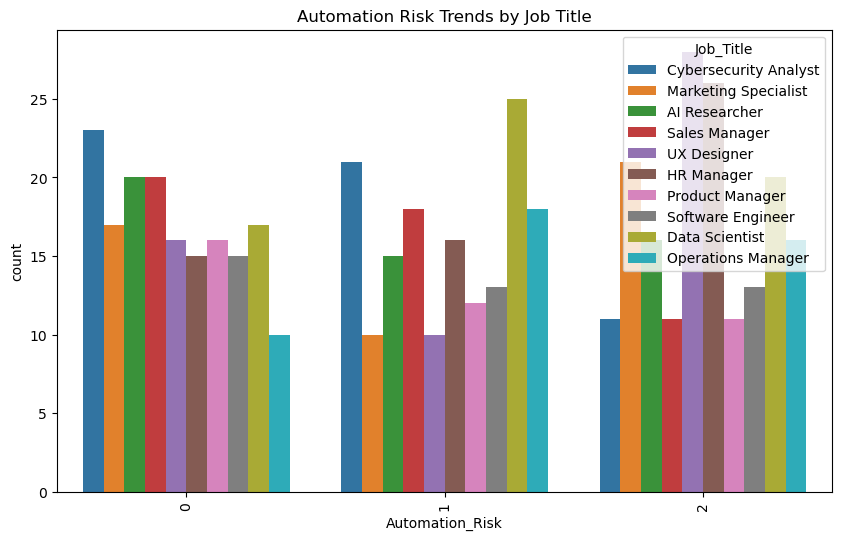

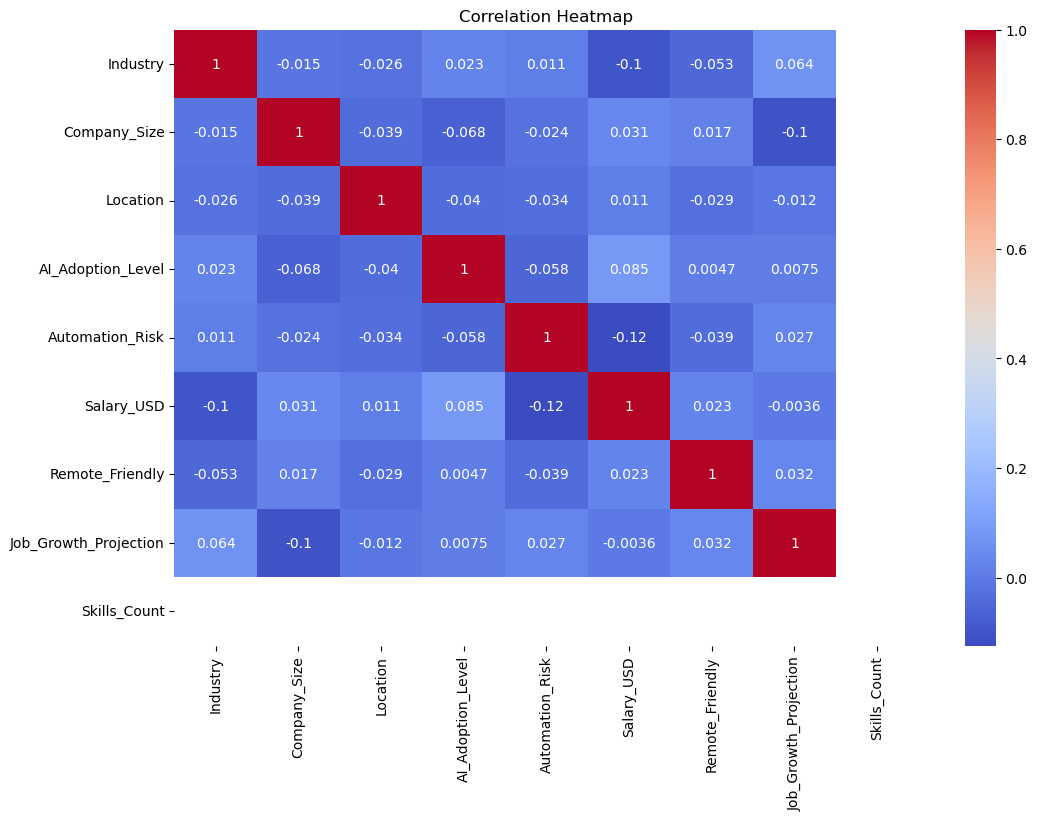

In [3]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Industry', y='Salary_USD', data=df)
plt.title('Salary Distribution by Industry')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='Automation_Risk', hue='Job_Title', data=df)
plt.title('Automation Risk Trends by Job Title')
plt.xticks(rotation=90)
plt.show()

numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12,8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Salary Prediction Model

In [8]:
from sklearn.model_selection import train_test_split

X = df[['Industry', 'Company_Size', 'Location', 'AI_Adoption_Level', 'Automation_Risk', 'Remote_Friendly', 'Skills_Count']]
y = df['Salary_USD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((400, 7), (100, 7), (400,), (100,))

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"Linear Regression MAE: {mae_lr}")
print(f"Linear Regression RMSE: {rmse_lr}")


Linear Regression MAE: 0.8512047692382221
Linear Regression RMSE: 1.0798295620981575


In [10]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest RMSE: {rmse_rf}")


Random Forest MAE: 0.9237834483713793
Random Forest RMSE: 1.1685041296465941


In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

y_pred_best_rf = best_rf.predict(X_test)

mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))

print(f"Tuned Random Forest MAE: {mae_best_rf}")
print(f"Tuned Random Forest RMSE: {rmse_best_rf}")


Best parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Tuned Random Forest MAE: 0.8674536523210331
Tuned Random Forest RMSE: 1.1145822024427525


In [12]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost MAE: {mae_xgb}")
print(f"XGBoost RMSE: {rmse_xgb}")


XGBoost MAE: 1.0765936425708906
XGBoost RMSE: 1.3617498019320922


In [14]:
df['AI_Industry_Interaction'] = df['AI_Adoption_Level'] * df['Industry']
df['AI_Automation_Risk_Interaction'] = df['AI_Adoption_Level'] * df['Automation_Risk']
df['Industry_Automation_Risk_Interaction'] = df['Industry'] * df['Automation_Risk']

def categorize_region(location_code):
    if location_code in [0, 1, 2]:  # Example: Locations 0-2 might be Asia
        return 'Asia'
    elif location_code in [3, 4, 5]:  # Locations 3-5 might be Europe
        return 'Europe'
    elif location_code in [6, 7, 8]:  # Locations 6-8 might be Americas
        return 'Americas'
    else:
        return 'Other'

df['Region'] = df['Location'].apply(categorize_region)

df['Region'] = le.fit_transform(df['Region'])

In [15]:
X = df[['Industry', 'Company_Size', 'Location', 'AI_Adoption_Level', 'Automation_Risk', 
        'Remote_Friendly', 'Skills_Count', 'AI_Industry_Interaction', 
        'AI_Automation_Risk_Interaction', 'Industry_Automation_Risk_Interaction', 
        'Region']]
y = df['Salary_USD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_rf.fit(X_train, y_train)

y_pred_rf = best_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Tuned Random Forest with New Features MAE: {mae_rf}")
print(f"Tuned Random Forest with New Features RMSE: {rmse_rf}")


Tuned Random Forest with New Features MAE: 0.8725184750402513
Tuned Random Forest with New Features RMSE: 1.1237445972774123


In [16]:
from sklearn.feature_selection import RFE

selector = RFE(estimator=best_rf, n_features_to_select=10)
selector = selector.fit(X_train, y_train)

selected_features = X.columns[selector.support_]

print(f"Selected Features: {selected_features}")


Selected Features: Index(['Industry', 'Company_Size', 'Location', 'AI_Adoption_Level',
       'Automation_Risk', 'Remote_Friendly', 'AI_Industry_Interaction',
       'AI_Automation_Risk_Interaction',
       'Industry_Automation_Risk_Interaction', 'Region'],
      dtype='object')


In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_rf, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print(f"Cross-validated RMSE: {rmse_scores.mean()} ± {rmse_scores.std()}")


Cross-validated RMSE: 1.068878274860017 ± 0.08392639090295574


In [18]:
importances = best_rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)

for i in indices[::-1]:
    print(f"{feature_names[i]}: {importances[i]}")


Location: 0.18883505795578803
Industry_Automation_Risk_Interaction: 0.16615662564243985
Industry: 0.15447166148255329
AI_Industry_Interaction: 0.14410546578287312
Company_Size: 0.10725192984151576
Region: 0.05334731515449445
Remote_Friendly: 0.050481532486570564
AI_Automation_Risk_Interaction: 0.049232153851150096
AI_Adoption_Level: 0.04842747367347339
Automation_Risk: 0.03769078412914135
Skills_Count: 0.0


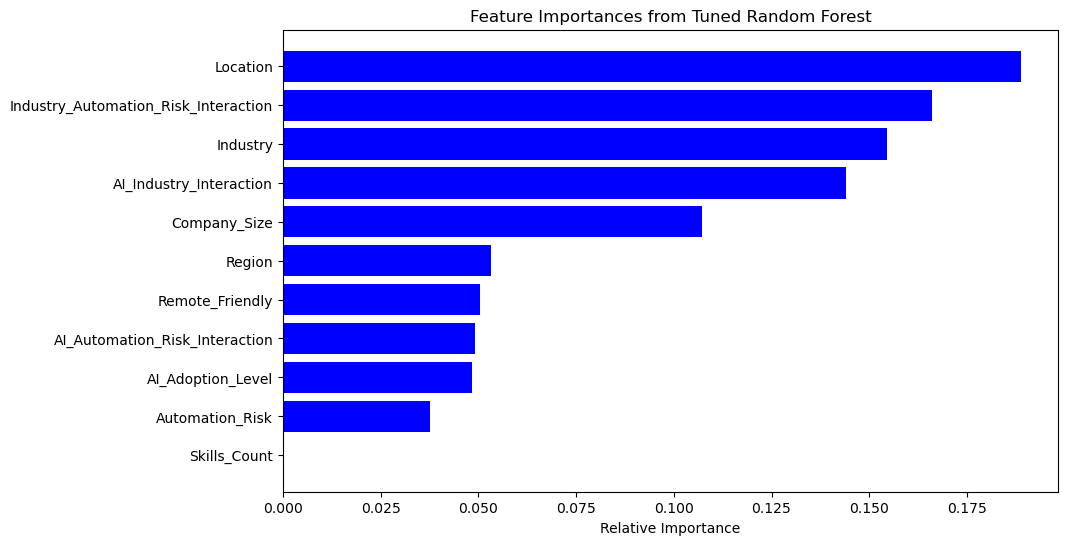

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.title('Feature Importances from Tuned Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


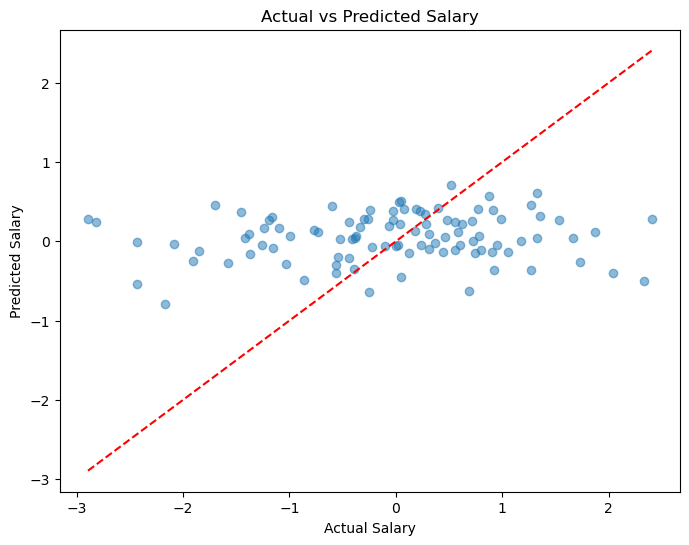

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for perfect prediction
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()
